### Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정 영역(Element)을 자르기
    - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
    - conda install -c anaconda pillow
    - pip install pillow
- 유투브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정 : 
    - 브라우져를 화면에 띄우지 않고 RAM 영역에만 띄어서 사용하는 방법
    - 팬텀js는 요새 안씀.
    - 서버에서 selenium을 이용해서 크롤링할때 사용

In [5]:
import requests
import time
import pandas as pd
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린 샷

In [6]:
# 박효신 눈의꽃 2절 시작 부분
url = 'https://www.youtube.com/watch?v=C_TsCZwdva4&t=120s'
driver = webdriver.Chrome()
driver.get(url)

In [10]:
driver.save_screenshot("datas/screenshot.png")
driver.quit()

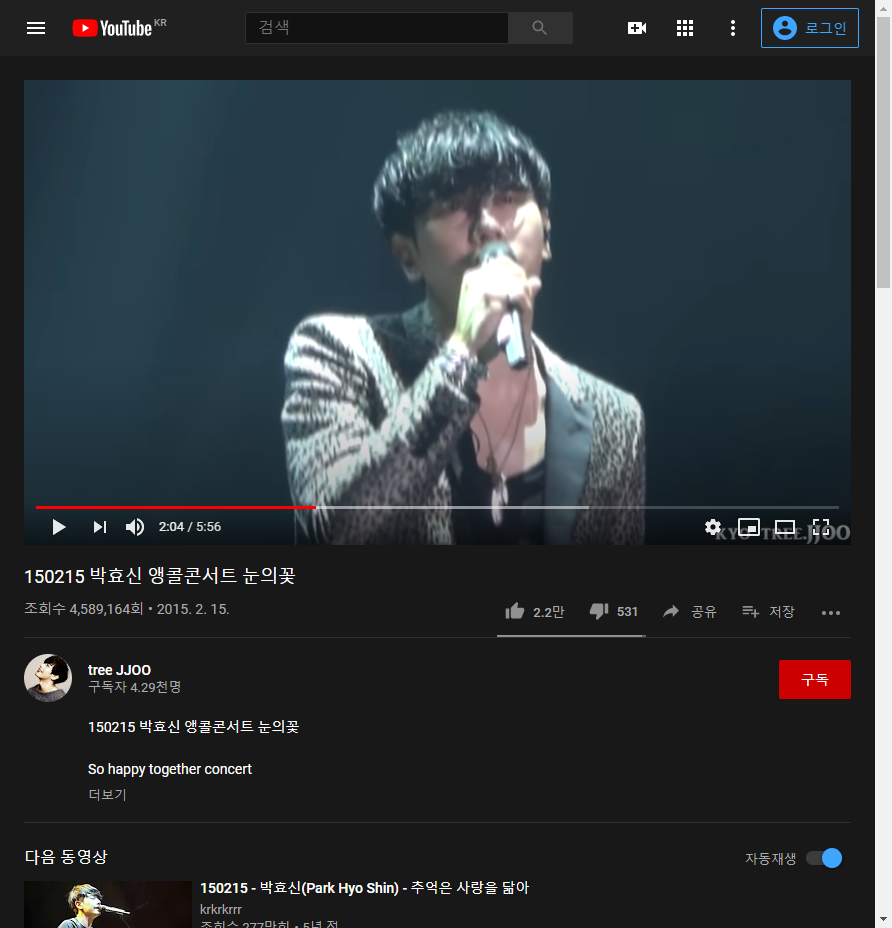

In [11]:
pil_img = pil.open("datas/screenshot.png")
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [12]:
driver = webdriver.Chrome()
driver.get(url)

In [13]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 465, 'width': 827}


In [14]:
# area 변경
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height']
area = (left, top, right, bottom)
area

(24, 80, 851, 545)

#### 3. 이미지를 pillow로 잘라주기

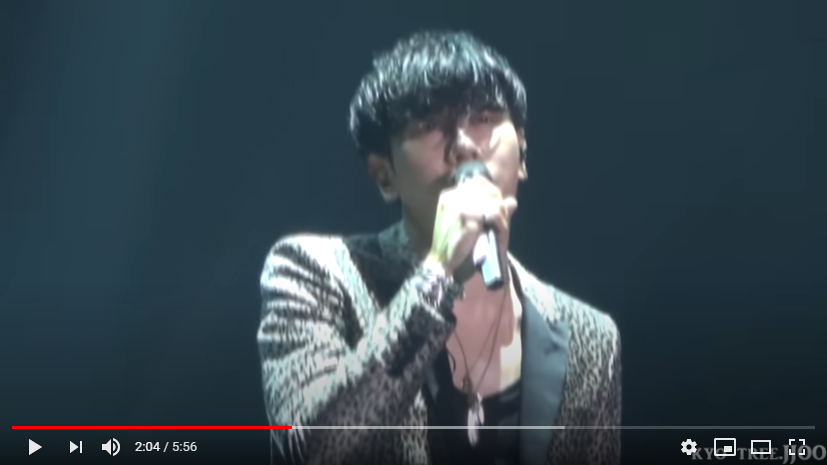

In [17]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [20]:
# 이미지 저장
pil_element_img.save("datas/screenshot_element.png")

#### 썸네일 만들기: 원본 이미지를 다양한 사이즈로 축소하는 방법